In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates = ['date'])

In [11]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [27]:
top_percentile = df.value.quantile(0.975)
bottom_percentile = df.value.quantile(0.025)
df = df[((df.value > bottom_percentile) & (df.value < top_percentile))]

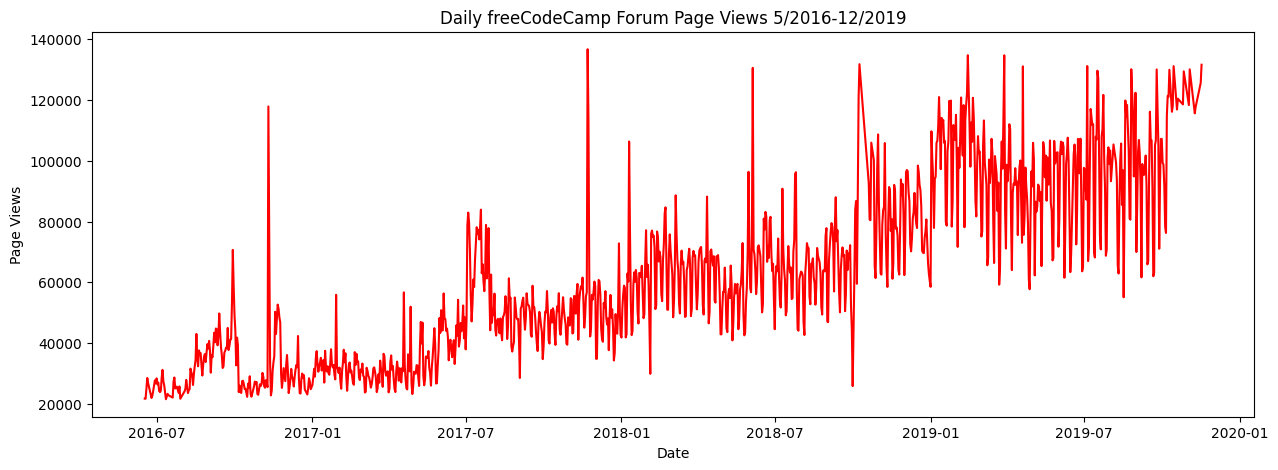

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df.value, color = "red")
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()

In [32]:
df.loc[:, 'Month'] = df.index.month
df.loc[:, 'Year'] = df.index.year

In [33]:
df

,value,Month,Year
date,,,
2016-06-17,21691,6,2016
2016-06-18,21681,6,2016
2016-06-20,28508,6,2016
2016-06-21,26805,6,2016
2016-06-25,21923,6,2016
...,...,...,...
2019-11-03,130118,11,2019
2019-11-09,115642,11,2019
2019-11-10,117717,11,2019


In [34]:
df_bar = df.groupby(['Month','Year']).value.mean()

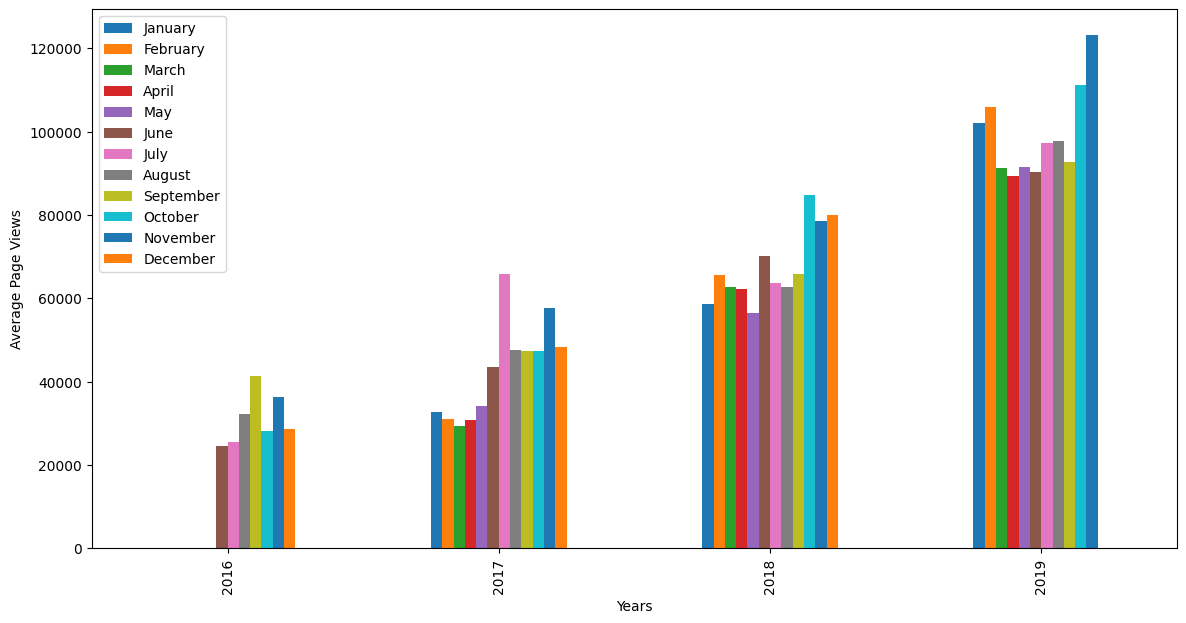

In [35]:
fig = df_bar.unstack(0).plot.bar(figsize=(14,7))
fig.set_xlabel('Years')
fig.set_ylabel('Average Page Views')
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.legend(fontsize = 10, labels = months)
plt.show()

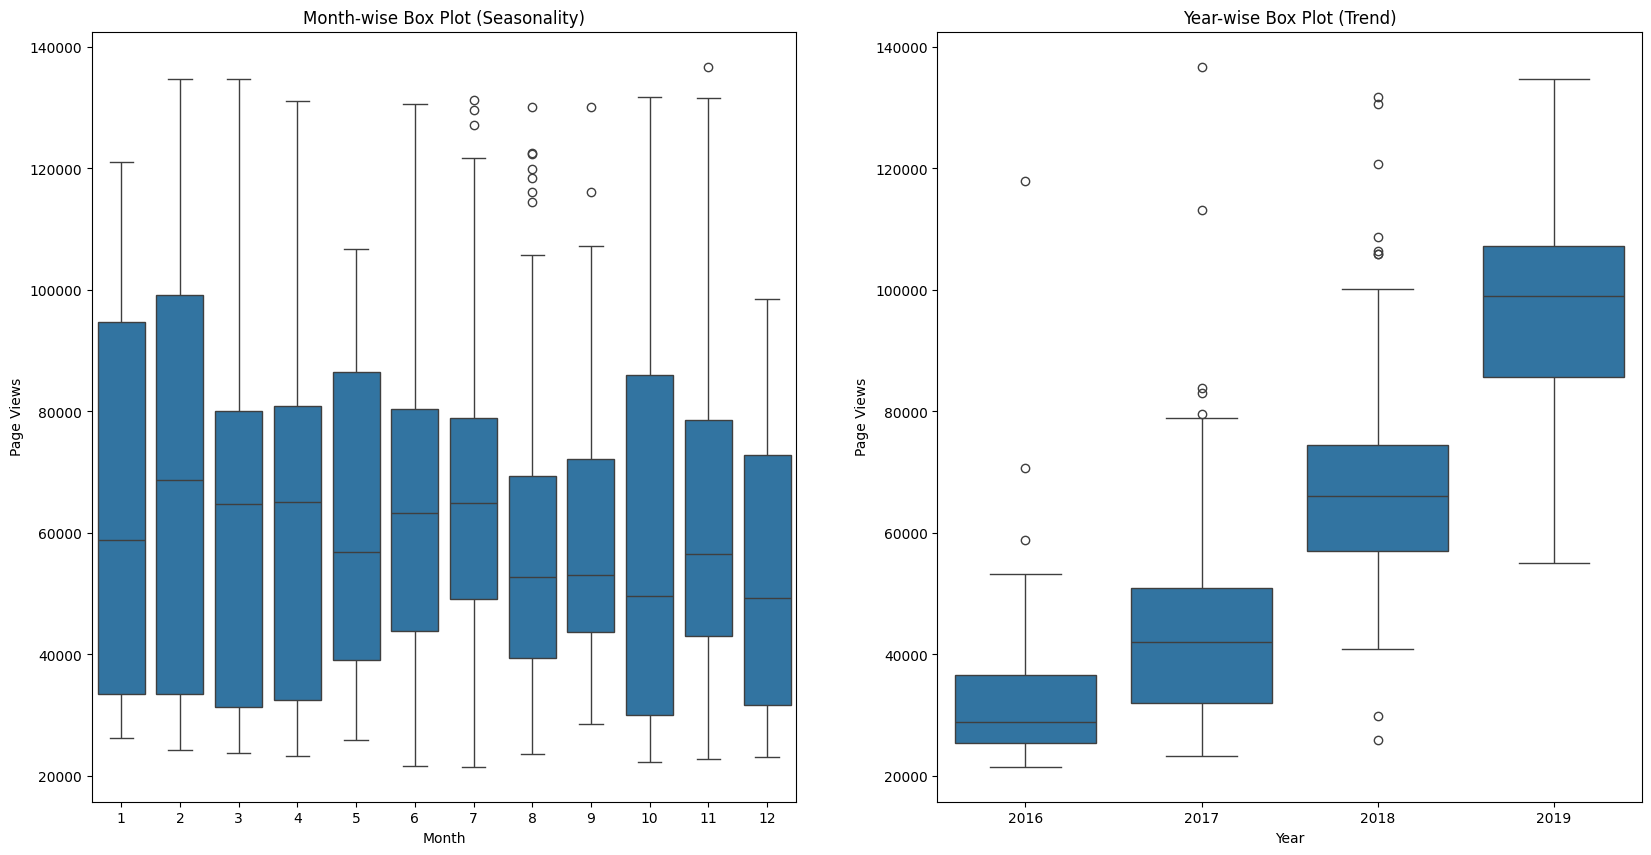

In [37]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x="Month", y="value", data=df, ax = axes[0])
ax1.set_xlabel('Month')
ax1.set_ylabel('Page Views')
ax1.set_title("Month-wise Box Plot (Seasonality)")

ax2 = sns.boxplot(x="Year", y="value", data=df, ax = axes[1])
ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2.set_title("Year-wise Box Plot (Trend)")

plt.show()